In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [334]:
df = pd.read_csv('Restaurant.csv')

# Exploratory Data Analysis

In [335]:
# First few rows of the dataset
df.head()

,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14.0,1
1,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,TASTY FLATBREAD,11.0,1
2,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,VEGETABLE SPECIALS,SARSON DA SAAG,15.0,1
3,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,VEGETABLE SPECIALS,PANEER VINDALOO,16.0,1
4,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,BREADS,GARLIC NAAN,3.5,2


DATA VISUALIZATION

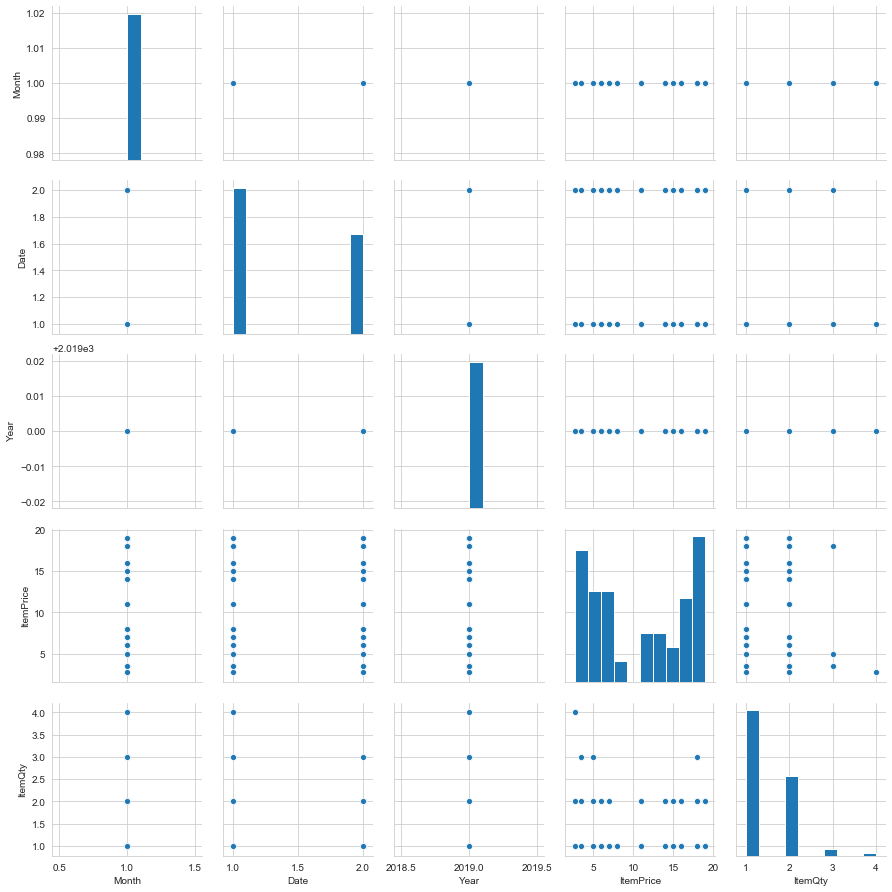

In [336]:
#Seaborn's pairplot showing pairwise relation between numerical Data
sns.pairplot(df,palette = 'rainbow')
plt.tight_layout()

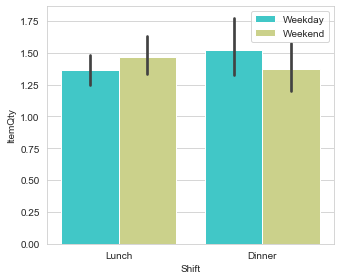

In [337]:
#So during Lunch the food was consumed more at Weekends
#And during Dinner more food was consumed at Weekdays 
sns.barplot(x = 'Shift',y = 'ItemQty',data = df,hue = 'Day Type',palette= 'rainbow')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

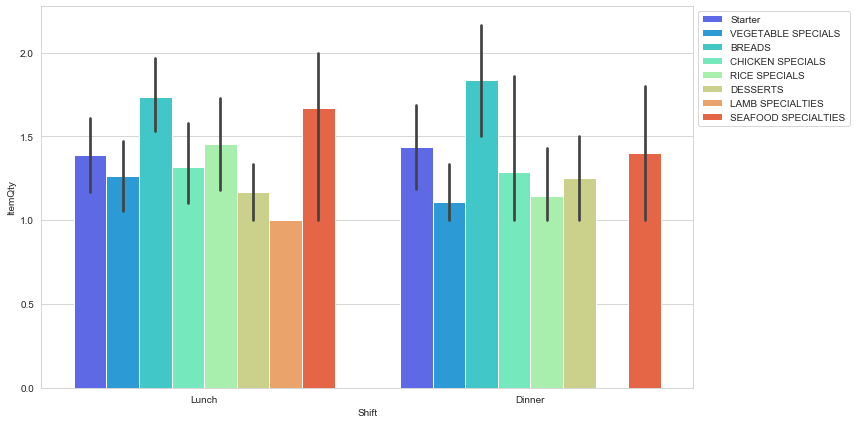

In [338]:
#So during Lunch 'BREADS' were consumed the highest
#And 'LAMB SPECIALITIES the lowest'

# During Dinner also 'BREADS' were consumed the highest
#And 'VEGETABLE SPECIALS' the lowest
sns.set_style('whitegrid')
plt.figure(figsize = (12,6))
sns.barplot(x = 'Shift',y = 'ItemQty',data = df,hue = 'MenuCateogry',palette= 'rainbow')
plt.legend(bbox_to_anchor = (1,1))
plt.tight_layout()

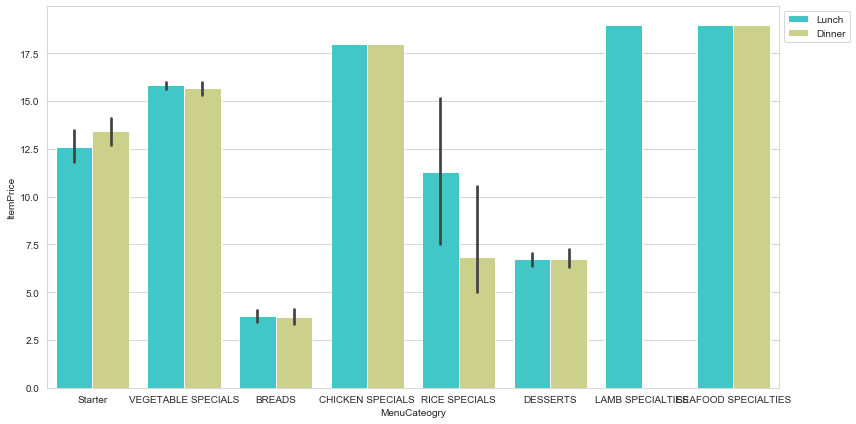

In [339]:
#The highest price was for the Lamb Special Ties and Seafood Special Ties
#One intersting fact is that Lamb Special food was not consumed at Dinner
#Although price of food at Dinner and Lunch for a particular category was same
#But for Starter,Vegetable Special,Rice Special it was different 
sns.set_style('whitegrid')
plt.figure(figsize = (12,6))
sns.barplot(x = 'MenuCateogry',y = 'ItemPrice',data = df,hue = 'Shift',palette= 'rainbow')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

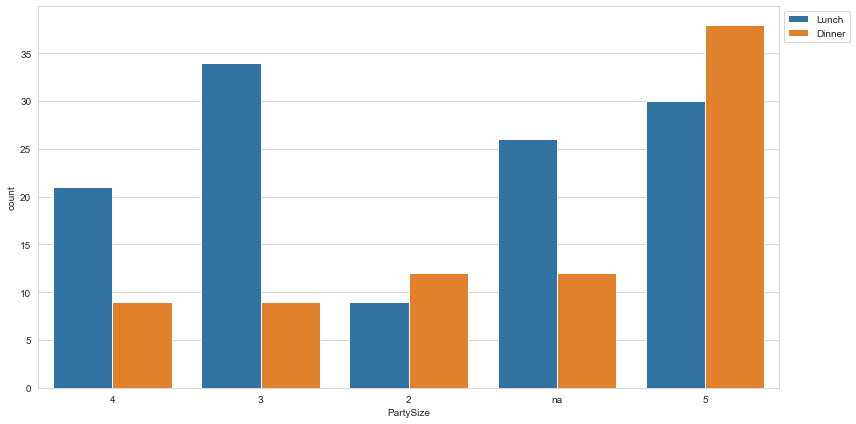

In [340]:
#Mostly 5 persons cosnumed food from the restaurants
#And it was consumed during Dinner

sns.set_style('whitegrid')
plt.figure(figsize = (12,6))
sns.countplot(x = 'PartySize',data = df,hue = 'Shift')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

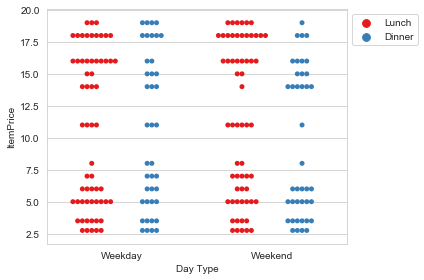

<Figure size 864x432 with 0 Axes>

In [341]:
sns.swarmplot(x = 'Day Type',y = 'ItemPrice',hue = 'Shift',data = df,palette = 'Set1',split = True)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
sns.set_style('whitegrid')
plt.figure(figsize = (12,6))

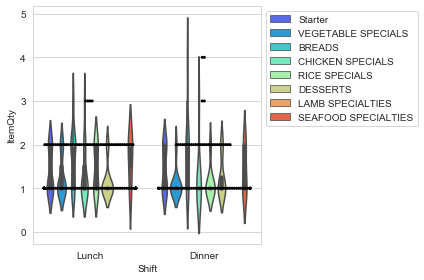

<Figure size 864x360 with 0 Axes>

In [342]:
sns.violinplot(x='Shift', y='ItemQty', data=df,palette='rainbow',hue = 'MenuCateogry',size=10,aspect=4)
sns.swarmplot(x='Shift', y='ItemQty', data=df,color='black',size=3)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.figure(figsize = (12,5))
sns.set_style('white')

<Figure size 864x432 with 0 Axes>

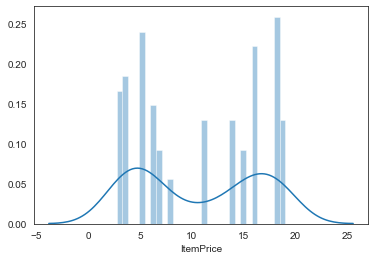

<Figure size 864x432 with 0 Axes>

In [343]:
sns.distplot(df['ItemPrice'],bins = 30)
plt.figure(figsize = (12,6))

<Figure size 864x432 with 0 Axes>

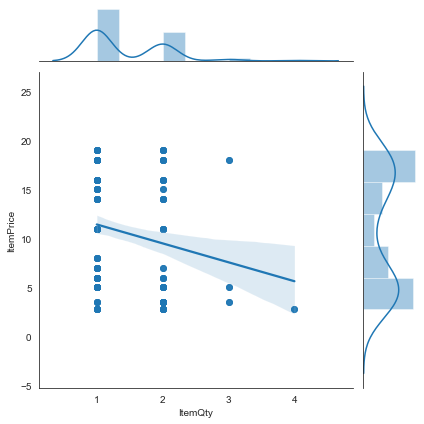

<Figure size 864x432 with 0 Axes>

In [344]:
sns.jointplot(x = 'ItemQty',y = 'ItemPrice',data = df,kind = 'reg')
plt.tight_layout()
plt.figure(figsize = (12,6))

In [345]:
df[['Shift','DTS','Day','PartySize','MenuItem','ItemQty','ItemPrice']].iplot(kind='box')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [346]:
df.iplot(kind='scatter',x='Shift',y='ItemPrice',mode='markers',size=10)

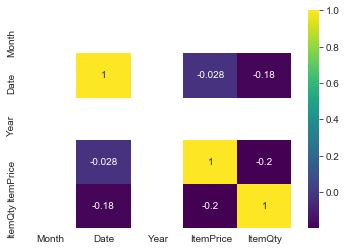

<Figure size 864x432 with 0 Axes>

In [347]:
# We see that the dataset features are mostly negatively correlated
# Or (They are mostly independent)
sns.heatmap(df.corr(),annot = True,cmap='viridis')
plt.figure(figsize = (12,6))
plt.tight_layout()
sns.set_style('whitegrid')

DATA ANALYSIS

In [348]:
# Here We Can see that top MenuItem is 'GARLIC NAAN'
# So it was consumed 80 times at Dinner for the month of January
# Was consumed 120 times at Lunch 
# So more preferred during Lunch Time
df[['Shift','MenuItem']].groupby('Shift').describe() 

MenuItem                         
          count unique          top freq
Shift                                   
Dinner       80     31  GARLIC NAAN   10
Lunch       120     38  GARLIC NAAN   10

SO TOP FOOD ITEM IS 'GARLIC NAAN'

In [349]:
df.duplicated().sum()

4

In [350]:
# There are 4 duplicate records
# Not droping them, they might affect the model accuracy
df[df.duplicated() == True]

,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
127,YALEV6B6K4,01/02/2019 12:05PM,Lunch,Weekend,Wednesday,1,2,2019,12:05PM,YALE0014,5,DESSERTS,CARROT HALWA,7.00,1
154,YALEV6B6K4,01/02/2019 12:30PM,Lunch,Weekend,Wednesday,1,2,2019,12:30PM,YALE0017,5,BREADS,TANDOORI ROTI,2.75,2
172,YALEV6B6K4,01/02/2019 7:00PM,Dinner,Weekend,Wednesday,1,2,2019,7:00PM,YALE0019,5,BREADS,GARLIC NAAN,3.50,2
185,YALEV6B6K4,01/02/2019 7:00PM,Dinner,Weekend,Wednesday,1,2,2019,7:00PM,YALE0019,5,BREADS,GARLIC NAAN,3.50,2


In [351]:
# All the number of unique items in different feature columns 
for x in df.columns:
    print('Unique value/values in',x,'are',df[x].nunique())

Unique value/values in StoreCode are 2
Unique value/values in DTS are 22
Unique value/values in Shift are 2
Unique value/values in Day Type are 2
Unique value/values in Day are 2
Unique value/values in Month are 1
Unique value/values in Date are 2
Unique value/values in Year are 1
Unique value/values in Time are 10
Unique value/values in TicketCode are 27
Unique value/values in PartySize are 5
Unique value/values in MenuCateogry are 8
Unique value/values in MenuItem are 43
Unique value/values in ItemPrice are 12
Unique value/values in ItemQty are 4


In [352]:
# All the unique items in different feature columns 
for x in df.columns:
    print('Unique value/values in',x,'are',list(df[x].unique()))
    print('\n')

Unique value/values in StoreCode are ['YALEV6B6K3', 'YALEV6B6K4']


Unique value/values in DTS are ['01/01/2019 11:30AM', '01/01/2019 11:40AM', '01/01/2019 11:50AM', '01/01/2019 12:05PM', '01/01/2019 12:10PM', '01/01/2019 12:20PM', '01/01/2019 12:30PM', '01/01/2019 6:30PM', '01/01/2019 7:00PM', '01/01/2019 8:30PM', '01/02/2019 11:30AM', '01/02/2019 11:40AM', '01/02/2019 11:50AM', '01/02/2019 12:05PM', '01/02/2019 12:10PM', '01/02/2019 12:20PM', '01/02/2019 12:30PM', '01/02/2019 1:00PM', '01/02/2019 6:30PM', '01/02/2019 7:00PM', '01/02/2019 8:30PM', '01/02/2019 8:15PM']


Unique value/values in Shift are ['Lunch', 'Dinner']


Unique value/values in Day Type are ['Weekday', 'Weekend']


Unique value/values in Day are ['Tuesday', 'Wednesday']


Unique value/values in Month are [1]


Unique value/values in Date are [1, 2]


Unique value/values in Year are [2019]


Unique value/values in Time are ['11:30AM', '11:40AM', '11:50AM', '12:05PM', '12:10PM', '12:20PM', '12:30PM', '6:30PM', '7:00PM

In [353]:
# Replacing the missing values indicated by 'na' by Nan using (numpy.nan)
df = df.replace('na',np.nan)

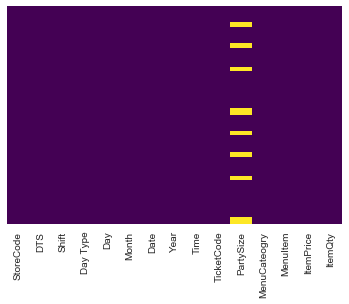

In [354]:
#There are some missing values in the 'PartySize' column
# misiing values Indicated by yellow bars
#Will fill these missing values in a little while 
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [355]:
#different days when customers visited (For this DataSet it's only Tuesday and Wednesday)
for i in df['DTS'][95:105]:
    print(pd.Timestamp(i).day_name())

Tuesday
Tuesday
Tuesday
Tuesday
Tuesday
Wednesday
Wednesday
Wednesday
Wednesday
Wednesday


In [356]:
# Basic Statistics from the given DataSet
#Can Ignore the 'Month','Date' and 'Year' columns because it's not significant
df.describe()

,Month,Date,Year,ItemPrice,ItemQty
count,200.0,200.000000,200.0,200.000000,200.000000
mean,1.0,1.405000,2019.0,10.587500,1.430000
std,0.0,0.492124,0.0,5.939432,0.605751
min,1.0,1.000000,2019.0,2.750000,1.000000
25%,1.0,1.000000,2019.0,5.000000,1.000000
50%,1.0,1.000000,2019.0,11.000000,1.000000
75%,1.0,2.000000,2019.0,16.000000,2.000000
max,1.0,2.000000,2019.0,19.000000,4.000000


In [357]:
#Summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StoreCode     200 non-null    object 
 1   DTS           200 non-null    object 
 2   Shift         200 non-null    object 
 3   Day Type      200 non-null    object 
 4   Day           200 non-null    object 
 5   Month         200 non-null    int64  
 6   Date          200 non-null    int64  
 7   Year          200 non-null    int64  
 8   Time          200 non-null    object 
 9   TicketCode    200 non-null    object 
 10  PartySize     162 non-null    object 
 11  MenuCateogry  200 non-null    object 
 12  MenuItem      200 non-null    object 
 13  ItemPrice     200 non-null    float64
 14  ItemQty       200 non-null    int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 23.6+ KB


In [358]:
# Dataframe consists of 200 rows and 15 columns
df.shape

(200, 15)

In [359]:
# Data Type of various feature columns of the Data Frame
#Mostly of them are objects
df.dtypes

StoreCode        object
DTS              object
Shift            object
Day Type         object
Day              object
Month             int64
Date              int64
Year              int64
Time             object
TicketCode       object
PartySize        object
MenuCateogry     object
MenuItem         object
ItemPrice       float64
ItemQty           int64
dtype: object

FILLING MISSING VALUES USING SIMPLE IMPUTER

In [360]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [361]:
# Convert the TimeStamp format to DateTime format
df['DTS'] = pd.to_datetime(df['DTS'])

# Assign new columns using .dt by selecting hour,month,year,etc from datetime column
# we just created above
df = df.assign(hour=df['DTS'].dt.hour,
               day=df['DTS'].dt.day,
               month=df['DTS'].dt.month,
               year=df['DTS'].dt.year,
              minute=df['DTS'].dt.minute)

In [362]:
# Drop the insignificant featutes like Store Code,Ticket Code
# Also drop DTS and Time column
#Since we have dealt with them above
df = df.drop(['StoreCode','TicketCode','Time','DTS'],axis = 1)

In [363]:
s = df.dtypes == 'object'
categorical = list(s[s].index)

In [364]:
categorical

['Shift', 'Day Type', 'Day', 'PartySize', 'MenuCateogry', 'MenuItem']

In [365]:
# Statistics for categorical data
df[categorical].describe()

,Shift,Day Type,Day,PartySize,MenuCateogry,MenuItem
count,200,200,200,162,200,200
unique,2,2,2,4,8,43
top,Lunch,Weekend,Wednesday,5,BREADS,GARLIC NAAN
freq,120,100,100,68,54,20


Split the Input and Output. Here we have to predict the Item Quantity, so treat it as output label.
So rest of the features are treated as input

# PREDICTING ITEM QUANTITY

In [366]:
y= df['ItemQty']
X = df.drop('ItemQty',axis = 1)

In [367]:
#Train Test Split 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [368]:
# The step of calculating most frequent value from respective column is done by the fit() method.
# The transform() method will just replace the NaNs in the column with the newly calculated value, and return the new dataset
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(imputer.transform(X_valid))

In [369]:
# Imputing removes the column, so just place them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

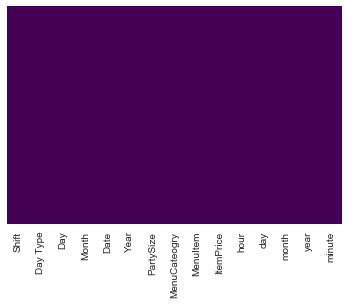

In [370]:
sns.heatmap(imputed_X_train.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

So Now we have filled the missing values.
This can be seen by heatmap above

Handling Categorical Data by One Hot Encoding

Label Encoding didn't perform better than One Hot encoding.
Since most of the categorical columns are Nominal, not ordinal

In [371]:
#encoder = LabelEncoder()

In [372]:
#label_X_train = imputed_X_train.copy()
#label_X_valid = imputed_X_valid.copy()

In [373]:
#for col in categorical:
    #label_X_train[col] = encoder.fit_transform(imputed_X_train[col])
    #label_X_valid[col] = encoder.transform(imputed_X_valid[col])


In [374]:
#my_scaler = StandardScaler()

In [375]:
#final_X_train_label = pd.DataFrame(my_scaler.fit_transform(label_X_train,y_train),columns = label_X_train.columns)
#final_X_valid_label = pd.DataFrame(my_scaler.transform(label_X_valid),columns = label_X_valid.columns)

In [376]:
#model = RandomForestRegressor(n_estimators = 100,random_state = 0)

In [377]:
#model.fit(final_X_train_label,y_train)

In [378]:
#preds = model.predict(final_X_valid_label)

In [379]:
#mean_absolute_error(y_valid,preds)

In [380]:
#mean_squared_error(y_valid,preds)

In [381]:
ohe = OneHotEncoder(sparse = False,handle_unknown= 'ignore') 

In [382]:
imputed_X_train.head()

,Shift,Day Type,Day,Month,Date,Year,PartySize,MenuCateogry,MenuItem,ItemPrice,hour,day,month,year,minute
0,Dinner,Weekend,Wednesday,1,2,2019,5,BREADS,ONION KULCHA,5,19,2,1,2019,0
1,Dinner,Weekday,Tuesday,1,1,2019,5,RICE SPECIALS,RICE,5,20,1,1,2019,30
2,Lunch,Weekday,Tuesday,1,1,2019,2,BREADS,ALOO PARATHA,5,12,1,1,2019,10
3,Lunch,Weekday,Tuesday,1,1,2019,2,BREADS,GARLIC NAAN,3.5,11,1,1,2019,50
4,Lunch,Weekday,Tuesday,1,1,2019,5,CHICKEN SPECIALS,CHICKEN SAAG,18,12,1,1,2019,10


In [383]:
# Again fitting and transforming the imputed Data for categorical features 
ohe_cols_train = pd.DataFrame(ohe.fit_transform(imputed_X_train[categorical]))
ohe_cols_valid = pd.DataFrame(ohe.transform(imputed_X_valid[categorical]))

In [384]:
# One Hot Encoding removes the indexes, so place them back
ohe_cols_train.index = imputed_X_train.index
ohe_cols_valid.index = imputed_X_valid.index

In [385]:
ohe_cols_train.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [386]:
num_X_train =  imputed_X_train.drop(categorical,axis = 1)
num_X_valid =  imputed_X_valid.drop(categorical,axis = 1)

In [387]:
ohe_X_train = pd.concat([num_X_train, ohe_cols_train], axis=1)
ohe_X_valid = pd.concat([num_X_valid, ohe_cols_valid], axis=1)

In [388]:
ohe_X_train.head()

,Month,Date,Year,ItemPrice,hour,day,month,year,minute,0,...,51,52,53,54,55,56,57,58,59,60
0,1,2,2019,5,19,2,1,2019,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2019,5,20,1,1,2019,30,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,2019,5,12,1,1,2019,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,2019,3.5,11,1,1,2019,50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,2019,18,12,1,1,2019,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We need to scale down our data , since most of the values far away from each other.
But range still will be the same.
We will use Standard Scaling, where mean is zero and Standard deviation is unity(of the distribution) 

In [389]:
my_scaler = StandardScaler()

In [390]:
# Fitting and transforming the data
ohe_X_final_train = pd.DataFrame(my_scaler.fit_transform(ohe_X_train),columns = ohe_X_train.columns)

In [391]:
ohe_X_final_valid = pd.DataFrame(my_scaler.transform(ohe_X_valid),columns = ohe_X_valid.columns)

In [392]:
ohe_X_final_train.head()

,Month,Date,Year,ItemPrice,hour,day,month,year,minute,0,...,51,52,53,54,55,56,57,58,59,60
0,0.0,1.171700,0.0,-0.997938,1.264240,0.985815,0.0,0.0,-1.433474,1.321022,...,-0.120386,-0.120386,-0.084819,-0.19245,-0.171499,-0.120386,-0.084819,-0.211604,-0.084819,-0.084819
1,0.0,-0.853461,0.0,-0.997938,1.539931,-1.014389,0.0,0.0,0.603951,1.321022,...,-0.120386,-0.120386,-0.084819,-0.19245,-0.171499,-0.120386,-0.084819,-0.211604,-0.084819,-0.084819
2,0.0,-0.853461,0.0,-0.997938,-0.665597,-1.014389,0.0,0.0,-0.754332,-0.756990,...,-0.120386,-0.120386,-0.084819,-0.19245,-0.171499,-0.120386,-0.084819,-0.211604,-0.084819,-0.084819
3,0.0,-0.853461,0.0,-1.254839,-0.941288,-1.014389,0.0,0.0,1.962234,-0.756990,...,-0.120386,-0.120386,-0.084819,-0.19245,-0.171499,-0.120386,-0.084819,-0.211604,-0.084819,-0.084819
4,0.0,-0.853461,0.0,1.228537,-0.665597,-1.014389,0.0,0.0,-0.754332,-0.756990,...,-0.120386,-0.120386,-0.084819,-0.19245,-0.171499,-0.120386,-0.084819,-0.211604,-0.084819,-0.084819


Now that our data is Standardised , as can be seen above.
We can now finally train our model and make predictions from validation set

Model 1- Random Forest

In [393]:
 model = RandomForestRegressor(n_estimators=100, random_state=0)

In [394]:
model.fit(ohe_X_final_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [395]:
pred = np.round(model.predict(ohe_X_final_valid))

In [396]:
#Metrics to calculate the error
#mean absolute error
mean_absolute_error(y_valid,pred)

0.36666666666666664

In [397]:
#Mean Squared Error
mean_squared_error(y_valid,pred)

0.43333333333333335

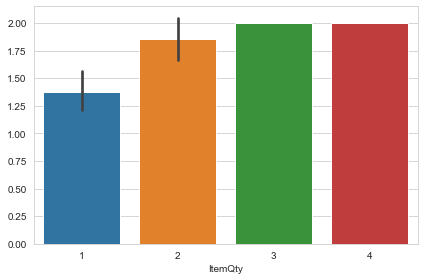

<Figure size 864x432 with 0 Axes>

In [398]:
# Plot of predicted Item Quantity vs actual unseen validation set Item Quantity
sns.barplot(x= y_valid,y = pred)
plt.tight_layout()
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

Model 2- XGBOOST

In [399]:
model = XGBRegressor()

In [400]:
model.fit(ohe_X_final_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [401]:
preds = model.predict(ohe_X_final_valid)

In [402]:
print(mean_absolute_error(y_valid,pred))
print(mean_squared_error(y_valid,pred))

0.36666666666666664
0.43333333333333335


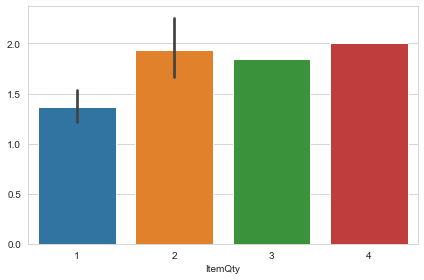

<Figure size 864x432 with 0 Axes>

In [403]:
# Plot of predicted Item Quantity vs actual unseen validation set Item Quantity
sns.barplot(x= y_valid,y = preds)
plt.tight_layout()
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

Model 3 -Linear Regression

In [409]:
model = LinearRegression()

In [410]:
model.fit(ohe_X_final_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [411]:
pred = model.predict(ohe_X_final_valid)

In [412]:
print(mean_absolute_error(y_valid,pred))
print(mean_squared_error(y_valid,pred))

0.4177511887516905
0.2909046641218503


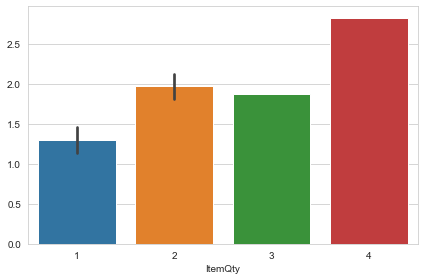

<Figure size 864x432 with 0 Axes>

In [413]:
# Plot of predicted Item Quantity vs actual unseen validation set Item Quantity
sns.barplot(x= y_valid,y = pred)
plt.tight_layout()
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

Model 4 -KNearest Neighbors

In [414]:
error_list = []
for i in range(1,25):
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(ohe_X_final_train,y_train)
    preds = model.predict(ohe_X_final_valid)
    error_list.append(np.mean(preds != y_valid ))

Text(0.5, 1.0, 'Error Rate Vs K Values')

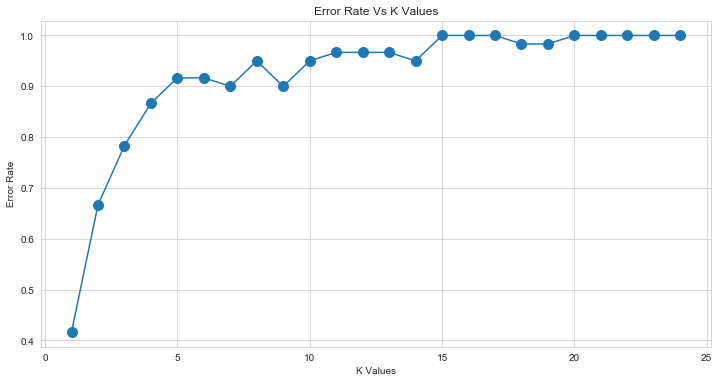

In [415]:
plt.figure(figsize= (12,6) )
plt.plot(range(1,25),error_list,marker = 'o',markersize = 10)
plt.xlabel('K Values')
plt.ylabel('Error Rate')

plt.title('Error Rate Vs K Values')

In [416]:
model = KNeighborsRegressor(n_neighbors = 5)

In [417]:
model.fit(ohe_X_final_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [418]:
preds = model.predict(ohe_X_final_valid)

In [419]:
preds

array([1.2, 1.6, 1.6, 1.6, 1.8, 2.4, 1.8, 1.4, 1.2, 1.8, 2.4, 1.6, 1.4,
       1.8, 1.6, 1.6, 1.4, 1.8, 1.8, 1.8, 2. , 1.4, 1.8, 2.2, 2.2, 1.4,
       1.8, 1.6, 1.4, 2. , 1.4, 1.6, 1. , 1.4, 2. , 1.4, 1.2, 1.8, 1. ,
       1.4, 1.8, 2.2, 1.6, 1.2, 1.6, 1. , 1.2, 1.8, 1.4, 1.6, 2.4, 2. ,
       2.2, 1.8, 1.8, 1.4, 2. , 2.2, 1.8, 1.8])

In [420]:
print(mean_absolute_error(y_valid,preds))
print(mean_squared_error(y_valid,preds))

0.5133333333333333
0.4133333333333333


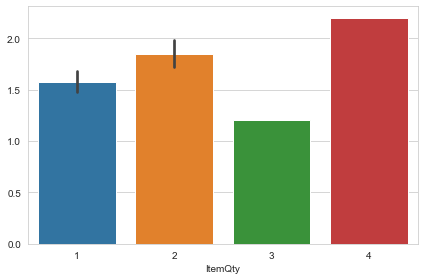

<Figure size 864x432 with 0 Axes>

In [421]:
# Plot of predicted Item Quantity vs actual unseen validation set Item Quantity
sns.barplot(x= y_valid,y = preds)
plt.tight_layout()
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

So Random Forest and XG Boost refressors perfomed well
Giving us lesser error in predicting the Item Quantity.

So Best model would be Random Forest/XG Boost

# Predicting MenuItem

In [422]:
df = pd.read_csv('Restaurant.csv')

In [423]:
df.head()

,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14.0,1
1,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,TASTY FLATBREAD,11.0,1
2,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,VEGETABLE SPECIALS,SARSON DA SAAG,15.0,1
3,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,VEGETABLE SPECIALS,PANEER VINDALOO,16.0,1
4,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,BREADS,GARLIC NAAN,3.5,2


In [424]:
df = df.replace('na',np.nan)

In [425]:
# Convert object data type to numeric for PartySize column
df['PartySize'] = pd.to_numeric(df['PartySize'])

In [426]:
# Filling Missing values with the median of the PartySize column which is 4.0
df[df['PartySize'].isnull() == True] = df[df['PartySize'].isnull() == True].fillna(df['PartySize'].median())

In [427]:
df.head()

,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,Starter,GOBI MANCHURIAN,14.0,1
1,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,Starter,TASTY FLATBREAD,11.0,1
2,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,VEGETABLE SPECIALS,SARSON DA SAAG,15.0,1
3,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,VEGETABLE SPECIALS,PANEER VINDALOO,16.0,1
4,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,BREADS,GARLIC NAAN,3.5,2


In [428]:
df['PartySize'].unique()

array([4., 3., 2., 5.])

In [429]:
df['DTS'] = pd.to_datetime(df['DTS'])

df = df.assign(hour=df['DTS'].dt.hour,
               day=df['DTS'].dt.day,
               month=df['DTS'].dt.month,
               year=df['DTS'].dt.year,
              minute=df['DTS'].dt.minute)

In [430]:
df.head()

,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty,hour,day,month,year,minute
0,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,Starter,GOBI MANCHURIAN,14.0,1,11,1,1,2019,30
1,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,Starter,TASTY FLATBREAD,11.0,1,11,1,1,2019,30
2,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,VEGETABLE SPECIALS,SARSON DA SAAG,15.0,1,11,1,1,2019,30
3,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,VEGETABLE SPECIALS,PANEER VINDALOO,16.0,1,11,1,1,2019,30
4,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,BREADS,GARLIC NAAN,3.5,2,11,1,1,2019,30


In [431]:
df = df.drop(['StoreCode','TicketCode','Time','DTS'],axis = 1)

In [432]:
df.head()

,Shift,Day Type,Day,Month,Date,Year,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty,hour,day,month,year,minute
0,Lunch,Weekday,Tuesday,1,1,2019,4.0,Starter,GOBI MANCHURIAN,14.0,1,11,1,1,2019,30
1,Lunch,Weekday,Tuesday,1,1,2019,4.0,Starter,TASTY FLATBREAD,11.0,1,11,1,1,2019,30
2,Lunch,Weekday,Tuesday,1,1,2019,4.0,VEGETABLE SPECIALS,SARSON DA SAAG,15.0,1,11,1,1,2019,30
3,Lunch,Weekday,Tuesday,1,1,2019,4.0,VEGETABLE SPECIALS,PANEER VINDALOO,16.0,1,11,1,1,2019,30
4,Lunch,Weekday,Tuesday,1,1,2019,4.0,BREADS,GARLIC NAAN,3.5,2,11,1,1,2019,30


Split the Input and Output. Here we have to predict the Menu Item, so treat it as output label.
So rest of the features are treated as input

In [433]:
y= df['MenuItem']
X = df.drop('MenuItem',axis = 1)

In [434]:
encoder = LabelEncoder()

In [435]:
y = encoder.fit_transform(y.values)

Since the 'y' feature is categorical so we have to encode it
to numeric values so that machine can interpret that

In [436]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [437]:
s = df.dtypes == 'object'
categorical = list(s[s].index)

In [438]:
categorical.remove('MenuItem')

In [439]:
# Columnwise encoding using Label Encoding each of the input columns
for col in categorical:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_valid[col] = encoder.transform(X_valid[col])


In [440]:
#ohe = OneHotEncoder(sparse = False,handle_unknown= 'ignore') 

In [441]:
#ohe_cols_train = pd.DataFrame(ohe.fit_transform(X_train[categorical]),index = X_train.index)
#ohe_cols_valid = pd.DataFrame(ohe.transform(X_valid[categorical]),index = X_valid.index)

In [442]:
#num_X_train =  X_train.drop(categorical,axis = 1)
#num_X_valid =  X_valid.drop(categorical,axis = 1)

In [443]:
#ohe_X_train = pd.concat([num_X_train, ohe_cols_train], axis=1)
#ohe_X_valid = pd.concat([num_X_valid, ohe_cols_valid], axis=1)

In [444]:
my_scaler = StandardScaler()

In [445]:
final_X_train_label = pd.DataFrame(my_scaler.fit_transform(X_train,y_train),columns = X_train.columns)
final_X_valid_label = pd.DataFrame(my_scaler.transform(X_valid),columns = X_valid.columns)

In [446]:
#ohe_X_final_train = pd.DataFrame(my_scaler.fit_transform(ohe_X_train,y_train),columns = ohe_X_train.columns)

In [447]:
#ohe_X_final_valid = pd.DataFrame(my_scaler.transform(ohe_X_valid),columns = ohe_X_valid.columns)

Random Forest Regressor (Model)

In [448]:
 model = RandomForestRegressor(n_estimators=100, random_state=0)

In [449]:
model.fit(final_X_train_label,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [450]:
#model.fit(ohe_X_final_train,y_train)

In [451]:
#pred = np.round(model.predict(ohe_X_final_valid))

In [452]:
pred = np.round(model.predict(final_X_valid_label))

Can use encoder.inverse_tramsform() to get the actual labels back..

In [453]:
#Metrics to calculate the error
#Root Mean Square error
np.sqrt(mean_absolute_error(y_valid,pred))

2.4596747752497685

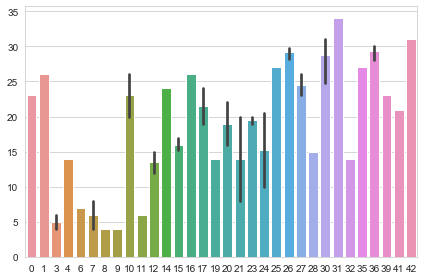

<Figure size 864x432 with 0 Axes>

In [454]:
## Plot of predicted MenuItem vs actual unseen validation set MenuItem
sns.barplot(x = y_valid,y = pred)
plt.tight_layout()
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')

Here Also Random Forrest Regressor is giving the lesser error.
So Here also our best model would be Random Forest Regressor